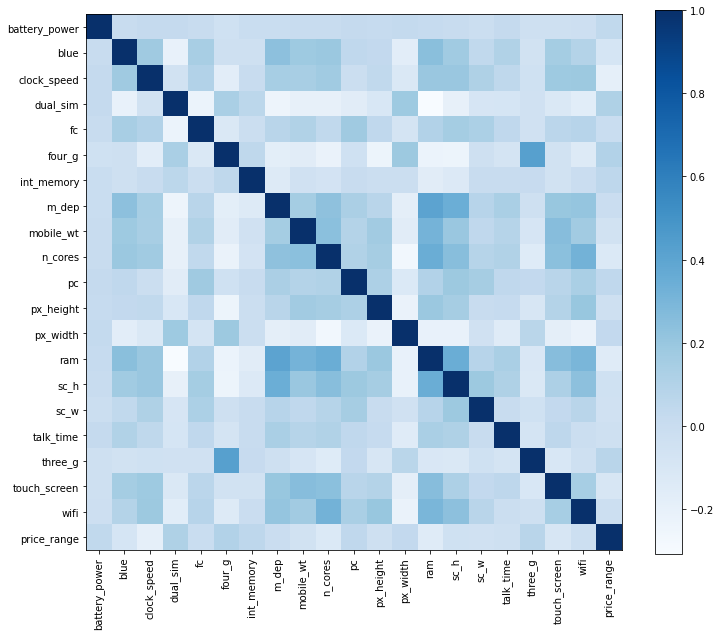

RMSE: 0.9861855945579353


TypeError: only size-1 arrays can be converted to Python scalars

In [2]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの読み込み
train = pd.read_csv("./original/train.csv")
test = pd.read_csv("./original/test.csv")

# データの前処理（不要な列の削除、欠損値の処理など）
train = train.drop(["id"], axis=1)
test = test.drop(["id"], axis=1)

# データの分析と可視化（相関係数や散布図などで特徴量と目的変数の関係を確認）
corr = train.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="Blues")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

# データの分割とモデルの選択（学習用データと検証用データに分けて、線形回帰モデルを選択）
X_train = train.drop(["price_range"], axis=1)
y_train = train["price_range"]
X_test = test.copy()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
model = LinearRegression()

# モデルの学習と評価（学習用データでモデルを学習し、検証用データで予測精度を評価）
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# モデルの保存と予測（学習したモデルをファイルに保存し、評価用データで予測値を出力）
import joblib
joblib.dump(model, "model.pkl")
model = joblib.load("model.pkl")
y_test = model.predict(X_test)

# 応募用サンプルファイルの作成（インデックスと予測値をcsvファイルに出力）
sample_submit = pd.DataFrame({"index": test.index, "price_range": int(y_test)})
sample_submit.to_csv("./original/submit_lr.csv", index=False, header=False)

In [1]:
# ワーニングメッセージを非表示にする
import warnings
warnings.simplefilter("ignore")

# データ分析によく使われるライブラリをインポートする
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter NotebookでMatplotlibのグラフを表示するための設定
%matplotlib inline

# 機械学習モデルの作成に必要なライブラリをインポートする
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import tree

# 以降のプログラムで使うための、各種ライブラリのインポートが完了した
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('./original/train.csv')
test = pd.read_csv('./original/test.csv')
sample = pd.read_csv('./original/sample_submission.csv')

In [3]:
print('Train:',train.shape,"Test:",test.shape,"Sample:",sample.shape)

Train: (1200, 22) Test: (800, 21) Sample: (799, 2)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1200 non-null   int64  
 1   battery_power  1200 non-null   int64  
 2   blue           1200 non-null   int64  
 3   clock_speed    1200 non-null   float64
 4   dual_sim       1200 non-null   int64  
 5   fc             1200 non-null   int64  
 6   four_g         1200 non-null   int64  
 7   int_memory     1200 non-null   int64  
 8   m_dep          1200 non-null   float64
 9   mobile_wt      1200 non-null   int64  
 10  n_cores        1200 non-null   int64  
 11  pc             1200 non-null   int64  
 12  px_height      1200 non-null   int64  
 13  px_width       1200 non-null   int64  
 14  ram            1200 non-null   int64  
 15  sc_h           1200 non-null   int64  
 16  sc_w           1200 non-null   int64  
 17  talk_time      1200 non-null   int64  
 18  three_g 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             800 non-null    int64  
 1   battery_power  800 non-null    int64  
 2   blue           800 non-null    int64  
 3   clock_speed    800 non-null    float64
 4   dual_sim       800 non-null    int64  
 5   fc             800 non-null    int64  
 6   four_g         800 non-null    int64  
 7   int_memory     800 non-null    int64  
 8   m_dep          800 non-null    float64
 9   mobile_wt      800 non-null    int64  
 10  n_cores        800 non-null    int64  
 11  pc             800 non-null    int64  
 12  px_height      800 non-null    int64  
 13  px_width       800 non-null    int64  
 14  ram            800 non-null    int64  
 15  sc_h           800 non-null    int64  
 16  sc_w           800 non-null    int64  
 17  talk_time      800 non-null    int64  
 18  three_g   

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       799 non-null    int64
 1   0       799 non-null    int64
dtypes: int64(2)
memory usage: 12.6 KB


In [7]:
train.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,...,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,...,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,...,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,...,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,...,364,1917,1970,16,7,6,1,1,1,0


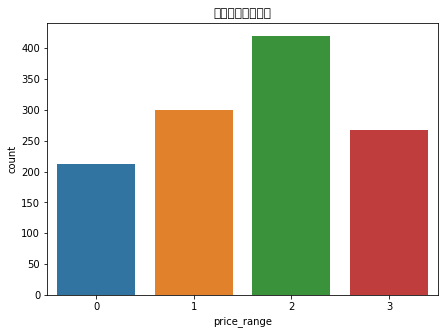

In [8]:
# MatplotlibのFigureを作成する。グラフのサイズを指定する。
plt.figure(figsize=(7,5))

# Seabornのcountplotを使って、train['y']の値の出現回数を数えて棒グラフで表示する。
sns.countplot(x=train['price_range'], data=train)

# グラフにタイトルを設定する。
plt.title('正解データの分布')

# グラフを表示する。
plt.show()

In [10]:
train_drop = train.copy()
train_drop = train_drop.drop(["id"], axis=1)
train_drop.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.003996,0.019023,0.021815,0.007575,-0.046592,-0.004472,-0.002157,0.003299,0.006534,0.021607,0.015351,0.027913,0.015143,0.005873,-0.019012,0.023556,-0.041570,-0.038742,-0.030133
blue,0.003996,1.000000,0.173361,-0.206119,0.140319,-0.040846,-0.034309,0.234187,0.178712,0.191763,0.042358,0.031420,-0.174403,0.245603,0.170100,0.034174,0.101628,-0.054095,0.154009,0.092095
clock_speed,0.019023,0.173361,1.000000,-0.062715,0.095958,-0.170448,0.003136,0.143849,0.140267,0.170709,-0.013971,0.038747,-0.120256,0.194149,0.196411,0.114948,0.046099,-0.043139,0.181372,0.185314
dual_sim,0.021815,-0.206119,-0.062715,1.000000,-0.227455,0.135709,0.054976,-0.245533,-0.202536,-0.203685,-0.164145,-0.108414,0.180104,-0.308245,-0.202653,-0.089559,-0.084006,-0.051075,-0.119458,-0.165253
fc,0.007575,0.140319,0.095958,-0.227455,1.000000,-0.122941,-0.018476,0.074037,0.104099,0.035988,0.174485,0.040067,-0.083314,0.096327,0.155321,0.125516,0.040988,-0.049892,0.060137,0.076877
four_g,-0.046592,-0.040846,-0.170448,0.135709,-0.122941,1.000000,0.047278,-0.179674,-0.160404,-0.225239,-0.043111,-0.238326,0.187369,-0.230661,-0.237922,-0.041104,-0.081096,0.423088,-0.057880,-0.140767
int_memory,-0.004472,-0.034309,0.003136,0.054976,-0.018476,0.047278,1.000000,-0.143142,-0.049610,-0.069189,-0.001623,-0.021696,-0.011868,-0.161366,-0.131194,0.008032,-0.000817,0.012739,-0.057134,-0.011101
m_dep,-0.002157,0.234187,0.143849,-0.245533,0.074037,-0.179674,-0.143142,1.000000,0.154319,0.233374,0.130464,0.073519,-0.185280,0.405339,0.343626,0.078833,0.135654,-0.039321,0.201698,0.209949
mobile_wt,0.003299,0.178712,0.140267,-0.202536,0.104099,-0.160404,-0.049610,0.154319,1.000000,0.240614,0.091333,0.163284,-0.161048,0.310345,0.194490,0.041595,0.081013,-0.092293,0.257425,0.166238
n_cores,0.006534,0.191763,0.170709,-0.203685,0.035988,-0.225239,-0.069189,0.233374,0.240614,1.000000,0.102969,0.149340,-0.268377,0.347014,0.252892,0.081218,0.100990,-0.147511,0.239578,0.315645


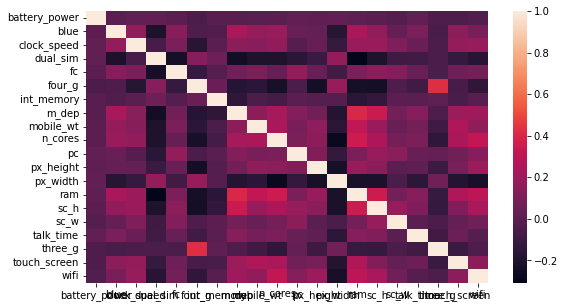

In [11]:
# ヒートマップで可視化
plt.figure(figsize=(9, 5))
sns.heatmap(train_drop.corr())
plt.xticks(rotation=0)
plt.show()

In [12]:
use_columns = ["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]
y = train["price_range"]
train = train[use_columns]
test = test[use_columns]

In [14]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1
1,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1
2,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1
3,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0
4,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1


In [15]:
#ss = StandardScaler()
#train_ss = pd.DataFrame(ss.fit_transform(train), columns=train.columns)
#test_ss = pd.DataFrame(ss.transform(test), columns=test.columns)

In [16]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1203,0,0.680981,1,1,1,23,0.402580,117,3,2,1331,721,1970,15,1,4,1,0,1
1,1203,1,2.602754,1,0,0,8,0.415612,194,1,19,1571,1262,1150,14,16,14,1,0,1
2,1980,1,2.604065,1,0,0,6,0.858110,122,2,15,364,721,1970,18,12,11,1,0,1
3,1185,1,2.669403,1,3,0,33,0.027065,132,8,4,447,1162,1950,15,3,19,1,0,0
4,1203,1,2.375453,0,4,1,12,0.141485,135,6,5,364,1917,1970,16,7,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,710,0,1.827054,0,0,1,61,0.139117,199,6,7,788,1023,3269,12,4,2,1,1,1
1196,965,1,0.498963,0,6,0,32,0.923505,103,1,2,813,721,1970,18,5,20,1,0,0
1197,1949,0,0.470755,0,1,0,38,0.798602,134,6,20,115,1951,1598,18,3,17,0,0,0
1198,1537,0,1.323370,0,1,1,4,0.122960,187,3,7,376,1692,3952,14,2,9,1,1,0


In [17]:
# データの分割
X_train, X_valid, y_train, y_valid = train_test_split(train, y, random_state=82)

In [18]:
# class_weightを設定することで不均衡データに対応
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
# 学習
dt.fit(X_train, y_train)
dt.fit(X_valid, y_valid)

# 予測・精度算出
train_pred = dt.predict(X_train)
valid_pred = dt.predict(X_valid)
print('train score : ', accuracy_score(y_train, train_pred))
print('valid score : ', accuracy_score(y_valid, valid_pred))

train score :  0.4033333333333333
valid score :  0.51


In [27]:
train_proba = dt.predict(X_train)[:, 1]
valid_proba = dt.predict(X_valid)[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [21]:
#AUCスコアでの精度
#print("train AUC:", roc_auc_score(y_train, train_proba))
#print("valid AUC:", roc_auc_score(y_valid, valid_proba))

In [22]:

#AUCスコアの可視化
#fpr, tpr, thresholds = roc_curve(y_valid, valid_proba)
#plt.figure(figsize=(7, 5))
#plt.plot(fpr, tpr, label=f"ROC curve (area={roc_auc_score(y_valid, valid_proba).round(2)})")
#plt.plot([0, 1.0], [0,1.0], linestyle="--", color="black")
#plt.xlabel('False Positive Rate')
#plt.ylabel('Ture Positive Rate')
#plt.legend()
#plt.grid()
#plt.show()

In [26]:
# testデータの予測
predict = dt.predict(test)[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [24]:
# submit_sampleの読み込み、提出フォームの作成
submit = pd.read_csv('./original/sample_submission.csv', header=None)
submit[1] = predict[:len(submit)]
submit.to_csv('./submission/submission_dt.csv', header=None, index=False)

In [25]:
submit.head()

,0,1
0,1,0.240385
1,2,0.422018
2,6,0.422018
3,10,0.422018
4,12,0.422018
